This a Analysis Report on Superstore 

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("F:\\project1.1\\.vscode\\my_project\\sample_superstre_data_analysis\\store.csv")    #F:\project1.1\.vscode\my_project\sample_superstre_data_analysis
print(df.head())

        Ship Mode    Segment        Country             City       State  \
0             NaN        NaN  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,NaN,NaN,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9990 non-null   object 
 1   Segment       9992 non-null   object 
 2   Country       9993 non-null   object 
 3   City          9992 non-null   object 
 4   State         9993 non-null   object 
 5   Postal Code   9993 non-null   int64  
 6   Region        9993 non-null   object 
 7   Category      9993 non-null   object 
 8   Sub-Category  9993 non-null   object 
 9   Sales         9993 non-null   float64
 10  Quantity      9993 non-null   int64  
 11  Discount      9993 non-null   float64
 12  Profit        9993 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.0+ KB


In [7]:
df.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,True,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,False,False,False,False,False,False,False,False,False,False,False,False,False
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# Generate summary statistics
summary_stats = df.describe()
# Display summary statistics as a table
display(summary_stats)

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55186.627539,229.856670,3.789753,0.156218,28.652464
std,32063.103801,623.276273,2.225149,0.206456,234.271411
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728000
50%,56301.000000,54.480000,3.000000,0.200000,8.662000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# **Dataset Insights**

## **Overview**
The dataset contains **9,993 records** with 5 numerical columns:  
- **Postal Code**  
- **Sales**  
- **Quantity**  
- **Discount**  
- **Profit**  

Key observations:  
- **Sales and Profit** show high variability (large standard deviations).  
- **Discounts** are applied in about **15.6%** of transactions on average.  
- Some transactions result in **negative profits**, indicating losses.  

---

## **Detailed Column Analysis**

### **1. Postal Code**
- **Range:** 1,040 to 99,301 (likely US ZIP codes).  
- **Mean:** 55,186.63  
- **Median (50th percentile):** 56,301 (close to the mean, suggesting a balanced distribution).  
- **Standard Deviation:** 32,063.10 (wide geographic spread).  

**Insight:**  
- The dataset covers a broad range of locations, with most transactions concentrated around the median ZIP code (56,301).  

---

### **2. Sales**
- **Range:** $0.44 to **$22,638.48** (extreme outliers likely present).  
- **Mean:** $229.86  
- **Median:** $54.48 (much lower than the mean, indicating **right-skewed distribution**).  
- **75th Percentile:** $209.94 (75% of sales are below $210).  

**Insights:**  
- Most transactions are **small sales** (median $54.48), but a few very large sales inflate the average.  
- Potential **outliers** (max $22,638.48) may need investigation.  

---

### **3. Quantity**
- **Range:** 1 to 14 units per transaction.  
- **Mean:** 3.79  
- **Median:** 3.00 (symmetric distribution).  
- **75th Percentile:** 5 (75% of orders have ≤5 items).  

**Insights:**  
- Most purchases involve **2-5 items** (middle 50% range).  
- Bulk orders (>5 items) are less common.  

---

### **4. Discount**
- **Range:** 0% to **80%**.  
- **Mean Discount:** 15.6%  
- **Median Discount:** 20%  
- **25th Percentile:** 0% (at least 25% of transactions have no discount).  

**Insights:**  
- Discounts are **bimodal**:  
  - **25% of sales** have **no discount**.  
  - **50% of sales** have a **20% discount** (common promotional rate).  
- Some extreme discounts (up to 80%) may drive sales but could hurt profitability.  

---

### **5. Profit**
- **Range:** -$6,599.98 to **$8,399.98** (high volatility).  
- **Mean Profit:** $28.65  
- **Median Profit:** $8.66 (much lower than mean, indicating **right-skew** due to high-profit outliers).  
- **25th Percentile:** $1.73 (25% of transactions have profit < $1.73).  
- **Negative Profits:** Some transactions lose money (min: -$6,599.98).  

**Insights:**  
- **Most sales are low-profit** (median $8.66).  
- **High discounts may lead to losses** (some profits are negative).  
- A few **extremely profitable transactions** pull the average up.  

---

## **Key Takeaways**
1. **Sales Distribution is Highly Skewed**  
   - Most sales are small (<$210), but a few very large sales exist.  
2. **Discounts Impact Profitability**  
   - High discounts (up to 80%) may lead to losses.  
   - The median discount is 20%, suggesting frequent promotions.  
3. **Profit Variability is Extreme**  
   - Some transactions lose money, while a few generate very high profits.  
4. **Typical Order Size is 2-5 Items**  
   - Bulk orders (>5 items) are less common.  

---

## **Recommendations**
- **Investigate Outliers:**  
  - Extremely high sales ($22K) and losses (-$6.6K) may need validation.  
- **Discount Strategy Review:**  
  - High discounts may not always drive profitable sales.  
- **Geographic Analysis:**  
  - Check if certain ZIP codes have better/worse profitability. 

array([[<Axes: title={'center': 'Postal Code'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Discount'}>],
       [<Axes: title={'center': 'Profit'}>, <Axes: >]], dtype=object)

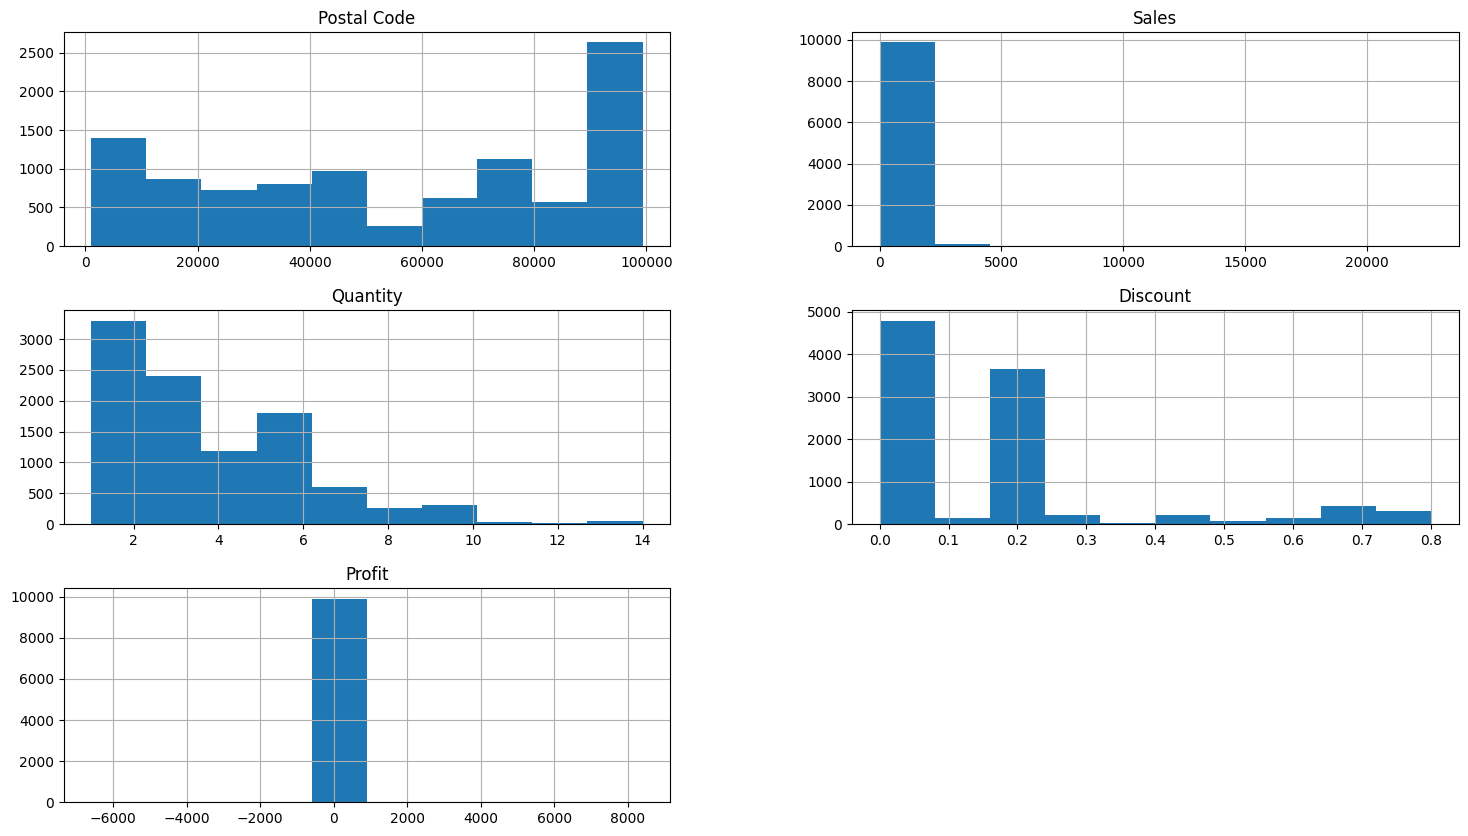

In [9]:
df.hist(bins=10, figsize=(18,10))

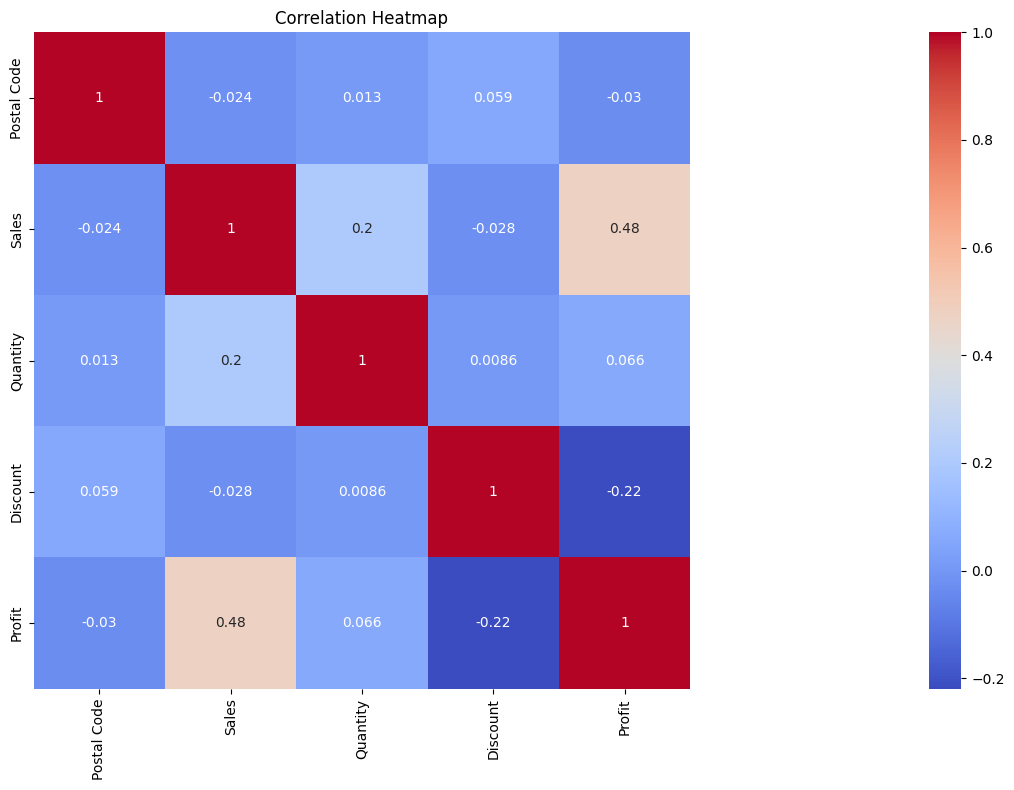

In [10]:
plt.figure(figsize=(48,8))
sns.heatmap(
    df.select_dtypes(include='number').corr(), 
    annot=True, 
    cmap='coolwarm', 
    square=True
)
plt.xticks(rotation=90)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
sns.pairplot(df, hue='Ship Mode')
plt.grid()

A. 
Variables Included:-
variables plotted are:
            1.Postal Code
            2.Sales
            3.Quantity
            4.Discount
            5.Profit
B.
Legend (Hue)
The legend shows color-coded categories from the Ship Mode column:
            🟠 First Class
            🔵 Second Class
            🟢 Standard Class
            🔴 Same Day            
Correlations:
Some pairs like Sales and Profit show moderate positive correlation.
Discount and Profit might show a negative relationship.
Outliers:
Some plots have extreme values — these can be flagged for further inspection.
Distributions by Category:
You can see which Ship Mode is more concentrated in certain ranges.
Separation:
If points of different colors form distinct clusters, it suggests that Ship Mode might be predictive of some variable. But here, the overlap suggests it's not a strong classifier by itself.

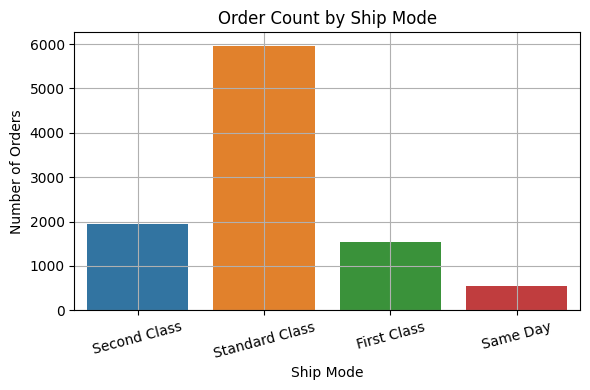

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Ship Mode', data=df, palette='tab10')
plt.title('Order Count by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Number of Orders')
plt.grid()
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Sales vs Profit

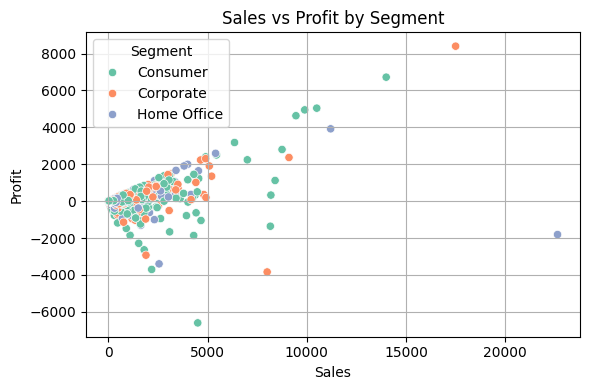

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Segment', palette='Set2')
plt.title('Sales vs Profit by Segment')
plt.grid()
plt.tight_layout()
plt.show()

Sales vs Discount

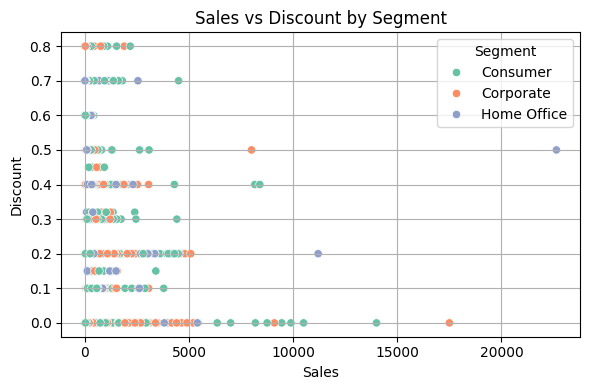

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Sales', y='Discount', hue='Segment', palette='Set2')
plt.title('Sales vs Discount by Segment')
plt.grid()
plt.tight_layout()
plt.show()

Quantity vs Profit

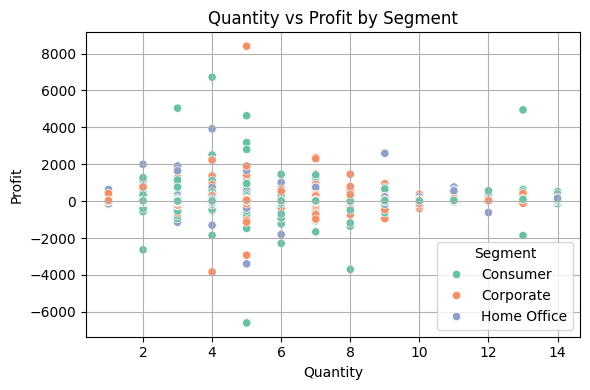

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Quantity', y='Profit', hue='Segment', palette='Set2')
plt.title('Quantity vs Profit by Segment')
plt.grid()
plt.tight_layout()
plt.show()


Discount vs Profit

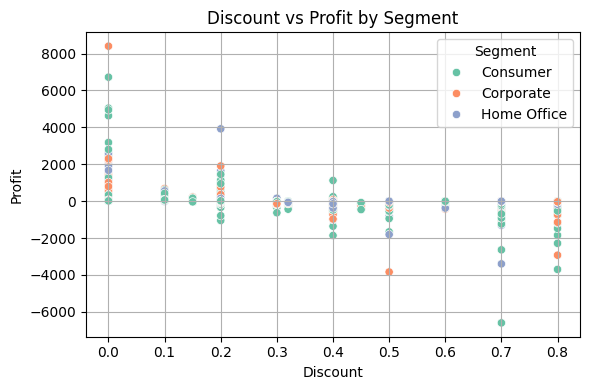

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Segment', palette='Set2')
plt.title('Discount vs Profit by Segment')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
data_shipmode = df.groupby('Ship Mode')[['Sales', 'Profit', 'Discount']].mean().round(2)
display(data_shipmode)


,Sales,Profit,Discount
Ship Mode,,,
First Class,228.50,31.84,0.16
Same Day,236.40,29.27,0.15
Second Class,236.09,29.51,0.14
Standard Class,227.58,27.49,0.16


array([<Axes: ylabel='Sales'>, <Axes: ylabel='Profit'>,
       <Axes: ylabel='Discount'>], dtype=object)

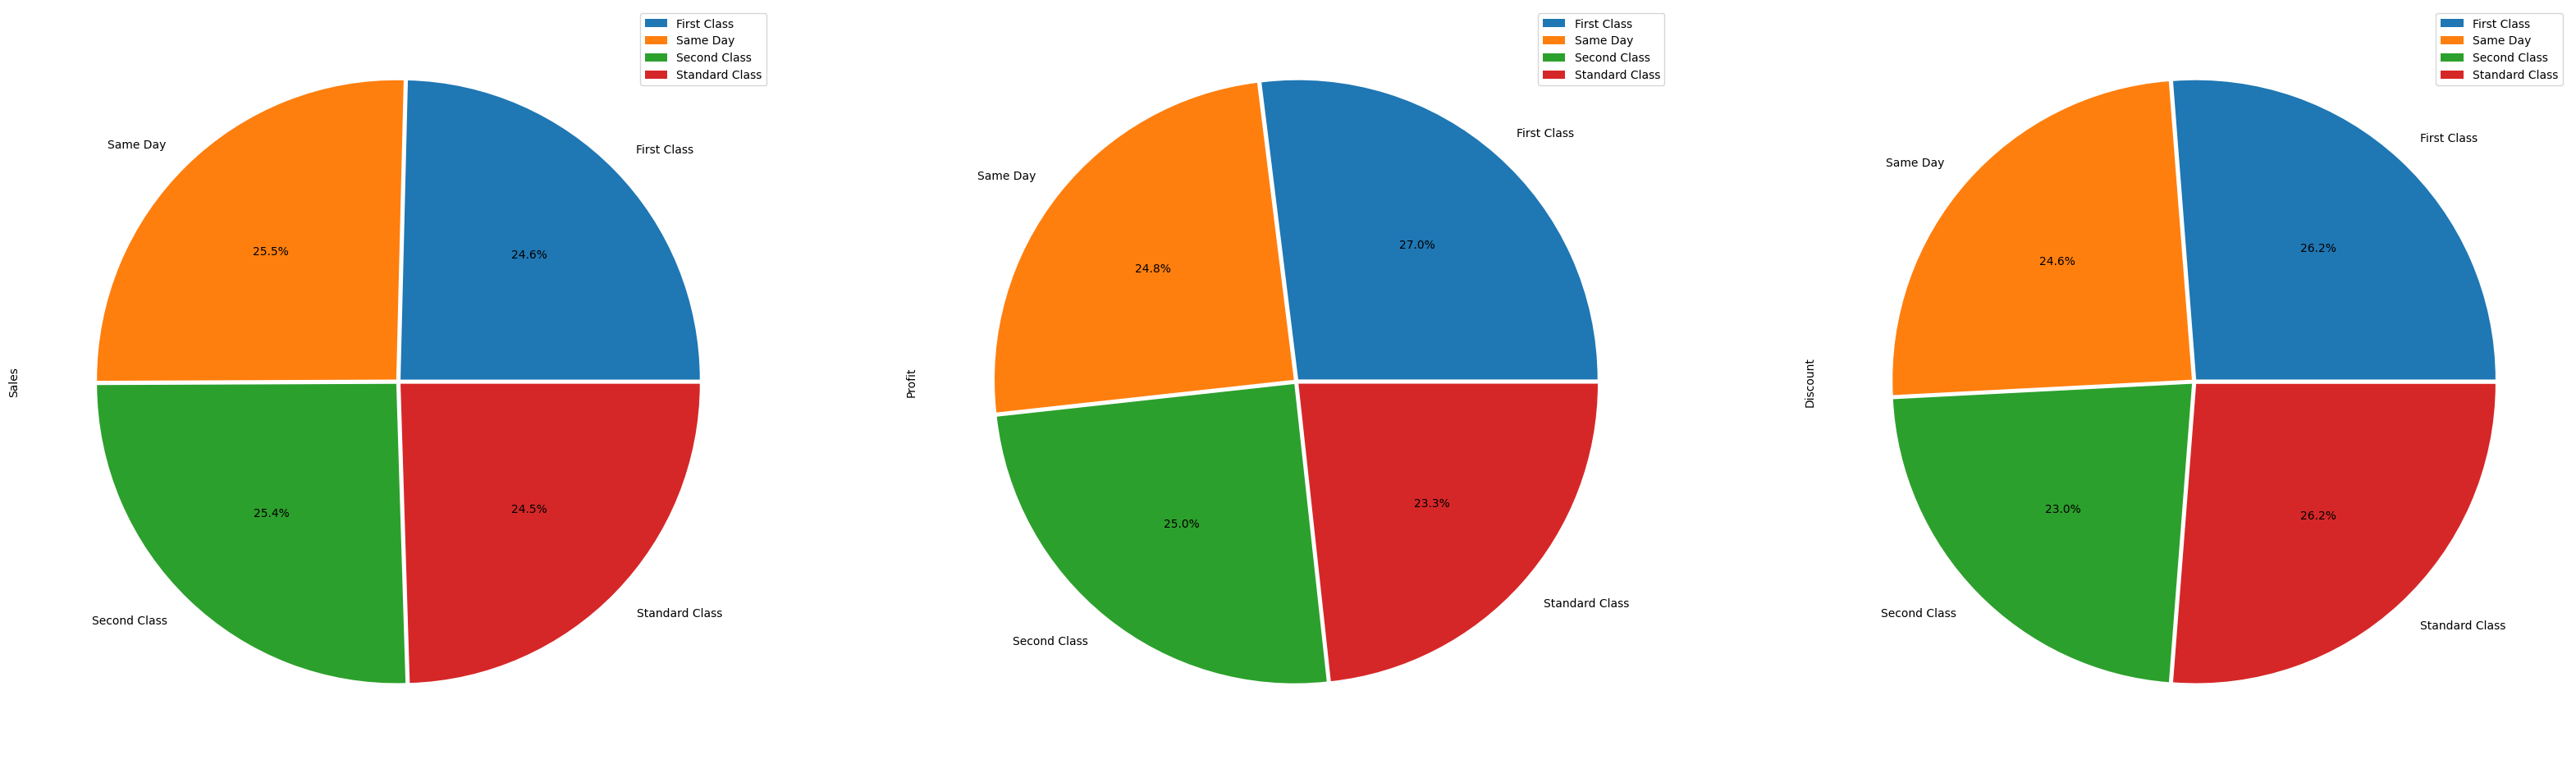

In [ ]:
data_shipmode.plot.pie(subplots=True, figsize=(40,40), labels=data_shipmode.index, autopct='%1.1f%%', explode=(0.01,0.01,0.01,0.01))

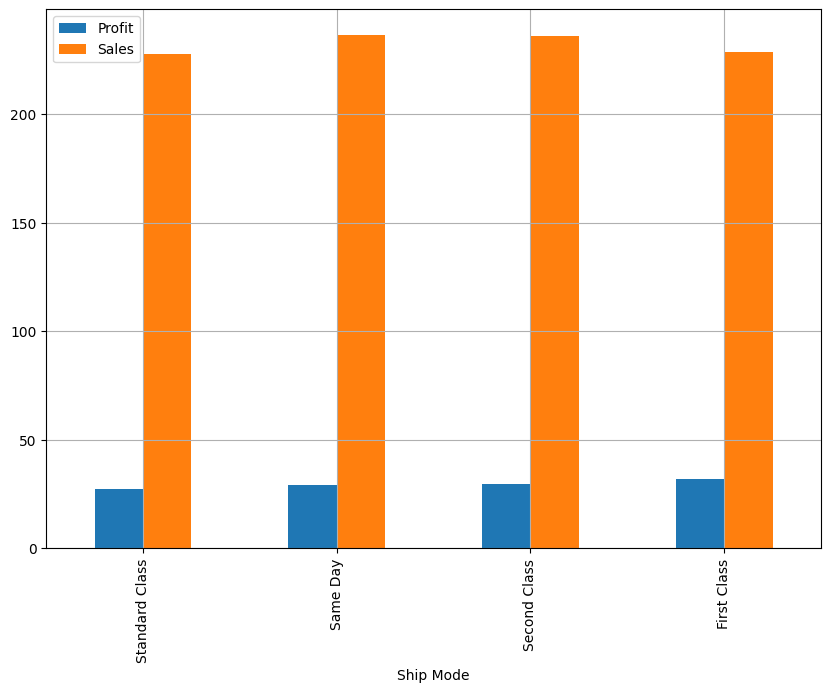

In [ ]:
data_shipmode.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(10,7))
plt.grid()

In [ ]:
data_shipmode.sum(axis=0)

Sales       928.57
Profit      118.11
Discount      0.61
dtype: float64

In [ ]:
data_shipmode['Sales%'] = data_shipmode['Sales']/9.285
data_shipmode['Profit%'] = data_shipmode['Profit']/1.181

In [ ]:
data_shipmode.sort_values('Profit%')

,Sales,Profit,Discount,Sales%,Profit%
Ship Mode,,,,,
Standard Class,227.58,27.49,0.16,24.510501,23.276884
Same Day,236.40,29.27,0.15,25.460420,24.784081
Second Class,236.09,29.51,0.14,25.427033,24.987299
First Class,228.50,31.84,0.16,24.609585,26.960203


Sales vs Profit

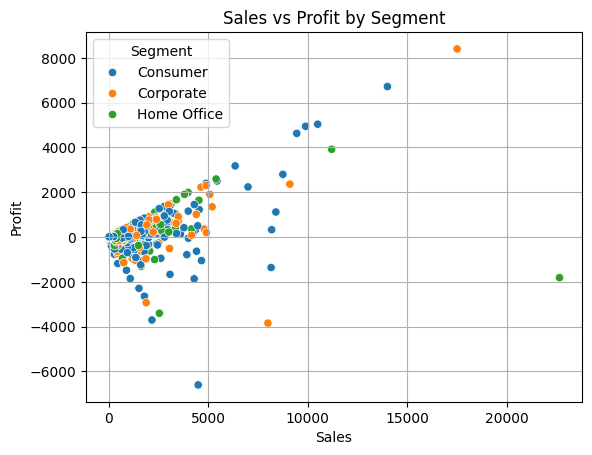

In [ ]:
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Segment')
plt.title('Sales vs Profit by Segment')
plt.grid()
plt.show()

Sales vs Quantity

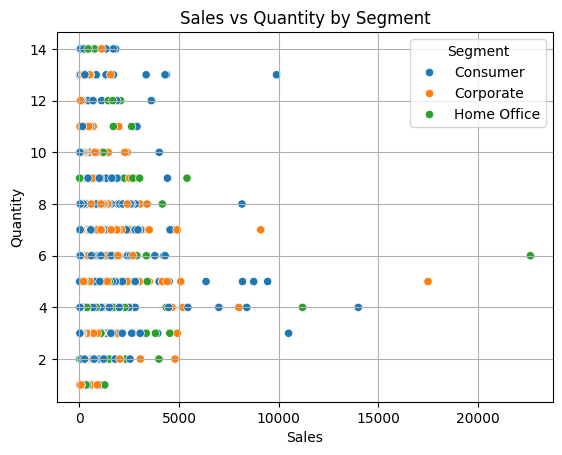

In [ ]:
sns.scatterplot(data=df, x='Sales', y='Quantity', hue='Segment')
plt.title('Sales vs Quantity by Segment')
plt.grid()
plt.show()

Discount vs Profit

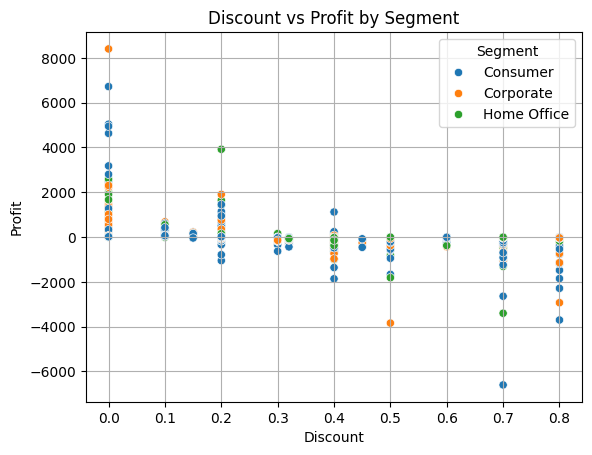

In [ ]:
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Segment')
plt.title('Discount vs Profit by Segment')
plt.grid()
plt.show()

Quantity vs Profit

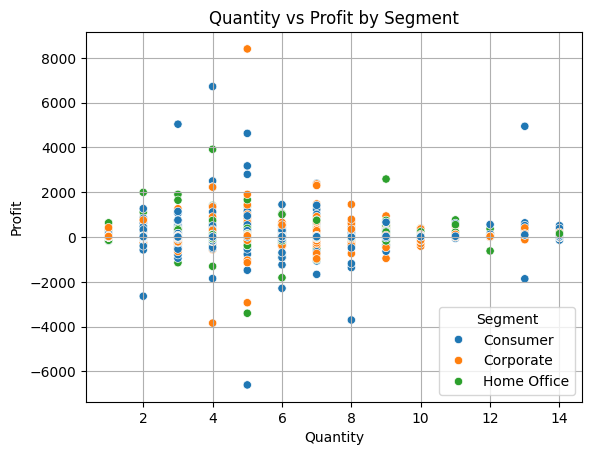

In [ ]:
sns.scatterplot(data=df, x='Quantity', y='Profit', hue='Segment')
plt.title('Quantity vs Profit by Segment')
plt.grid()
plt.show()

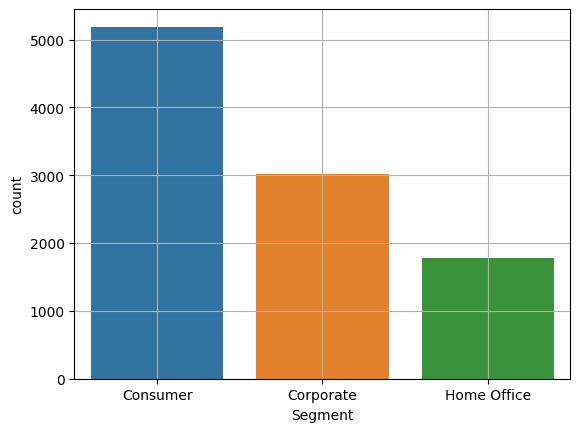

In [ ]:
sns.countplot(x='Segment', data=df, palette='tab10')
plt.grid()

In [ ]:
data_segment = df.groupby(['Segment'])[['Sales', 'Profit', 'Discount']].mean()
data_segment

,Sales,Profit,Discount
Segment,,,
Consumer,223.729901,25.827796,0.158171
Corporate,233.823300,30.456667,0.158228
Home Office,240.972041,33.818664,0.147128


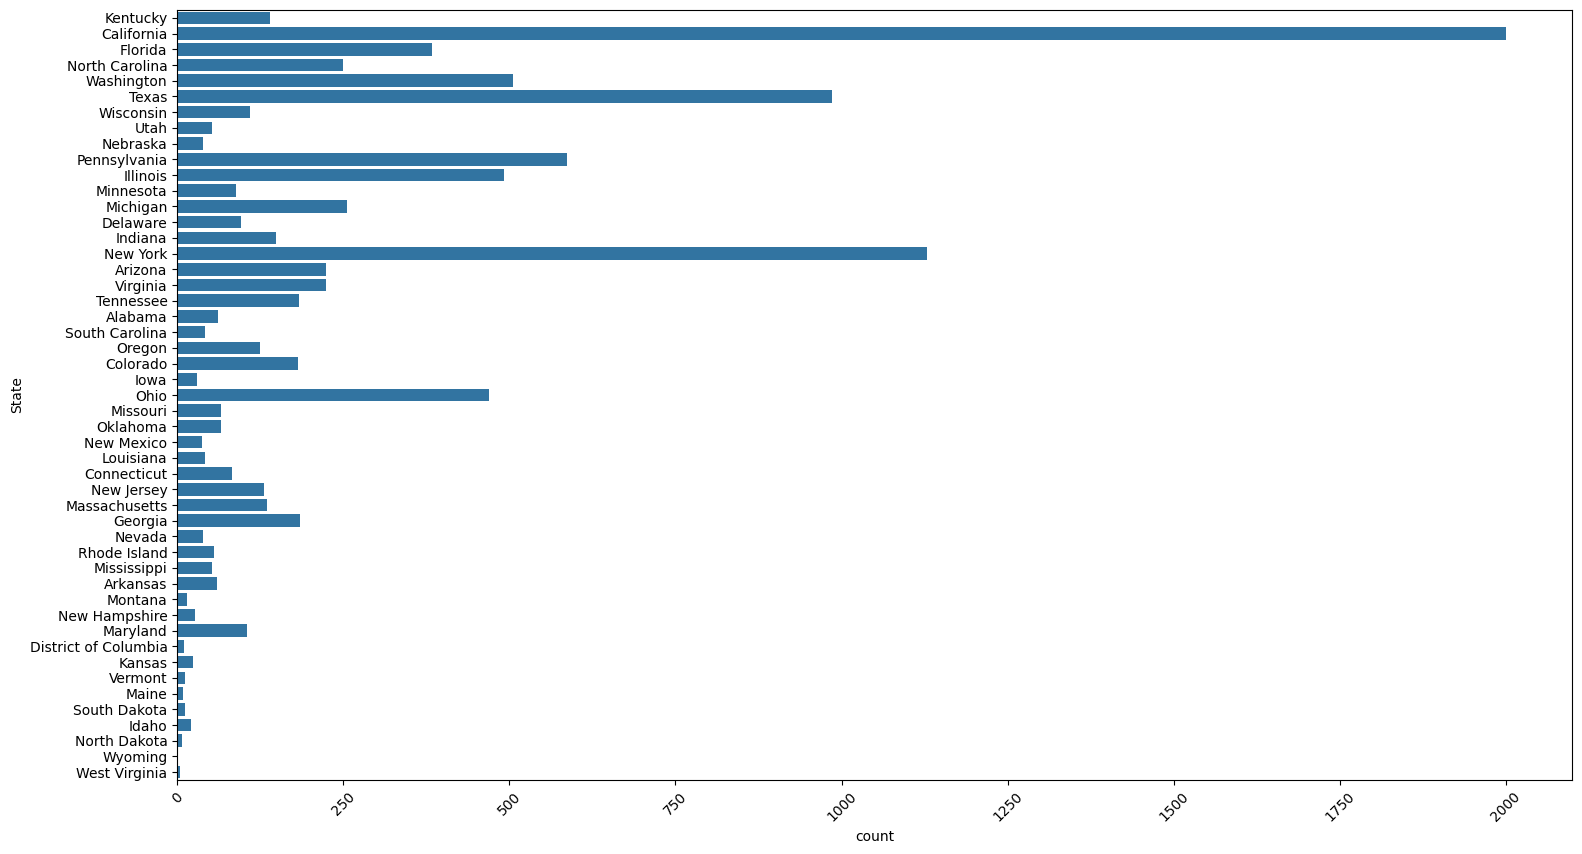

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(df['State'])
plt.xticks(rotation=45); # ; to remove the array text that was in the output.

In [ ]:
data_segment = df.groupby(['Segment'])[['Sales', 'Profit', 'Discount']].mean()

array([<Axes: ylabel='Sales'>, <Axes: ylabel='Profit'>,
       <Axes: ylabel='Discount'>], dtype=object)

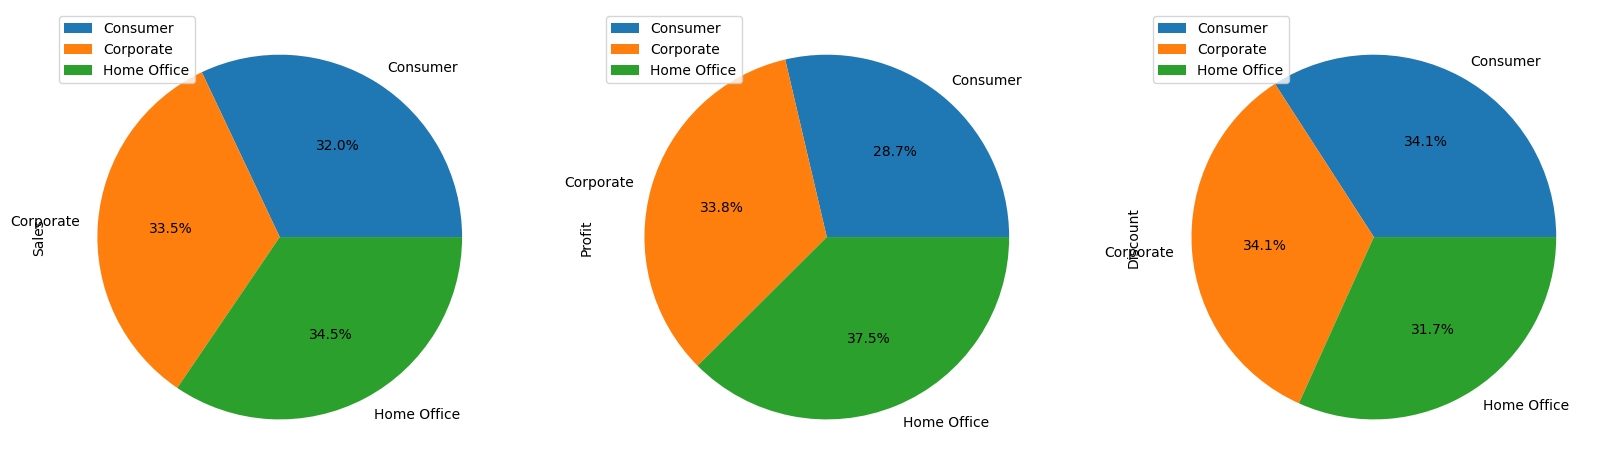

In [ ]:
data_segment.plot.pie(subplots=True, figsize=(20,10), labels=data_segment.index, autopct='%1.1f%%')

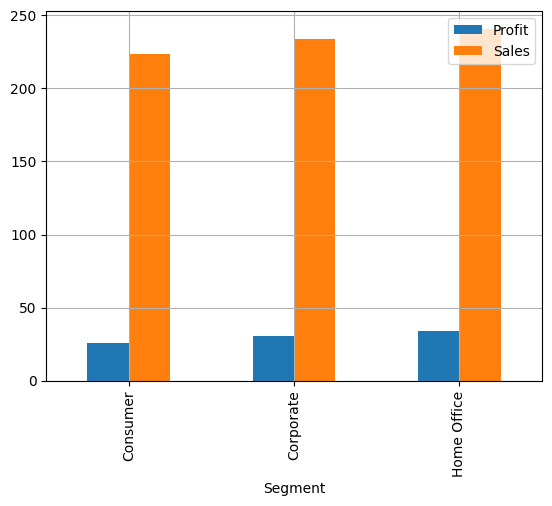

In [ ]:
data_segment.sort_values('Profit')[['Profit','Sales']].plot(kind='bar')
plt.grid()

In [ ]:
data_segment.sum(axis=0)

Sales       698.525242
Profit       90.103127
Discount      0.463528
dtype: float64

In [ ]:
data_state = df.groupby(['State'])[['Sales','Profit','Discount']].mean()

In [ ]:
data_state1 = data_state.sort_values('Profit')

In [ ]:
data_state2 = data_state.sort_values('Sales')

<Axes: xlabel='State'>

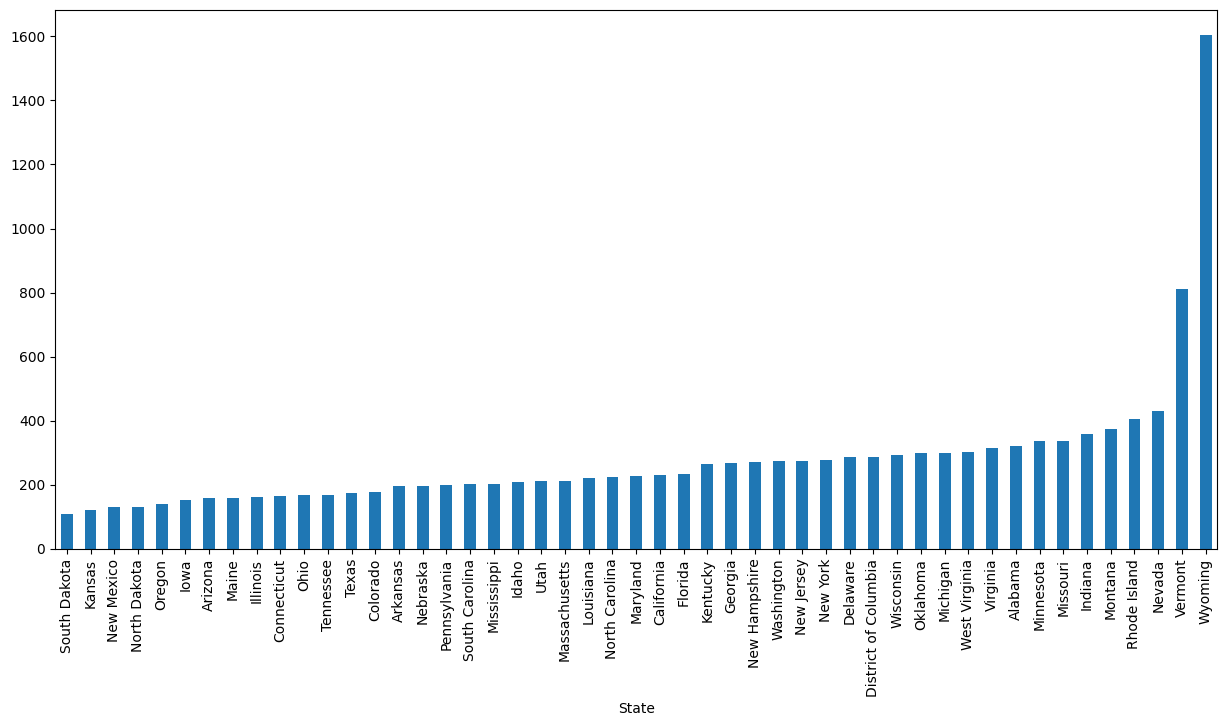

In [ ]:
data_state2['Sales'].plot(kind='bar', figsize=(15,7))

<Axes: xlabel='State'>

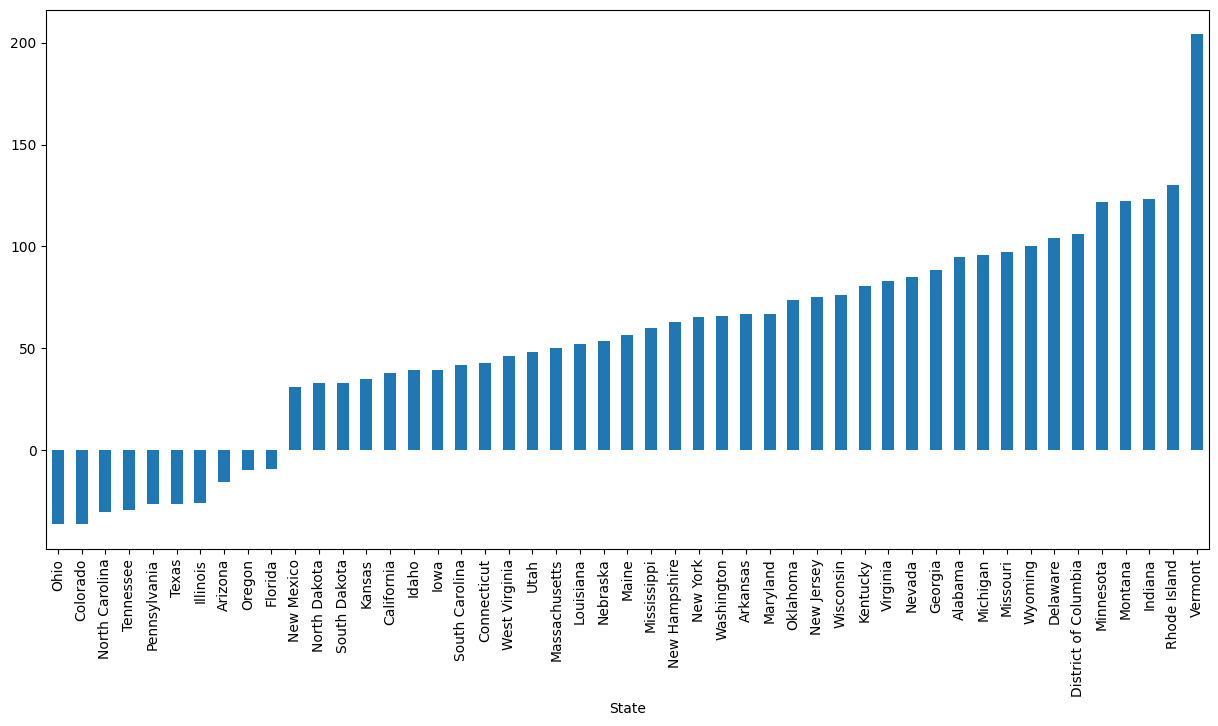

In [ ]:
data_state1['Profit'].plot(kind='bar', figsize=(15,7))

<Axes: xlabel='State'>

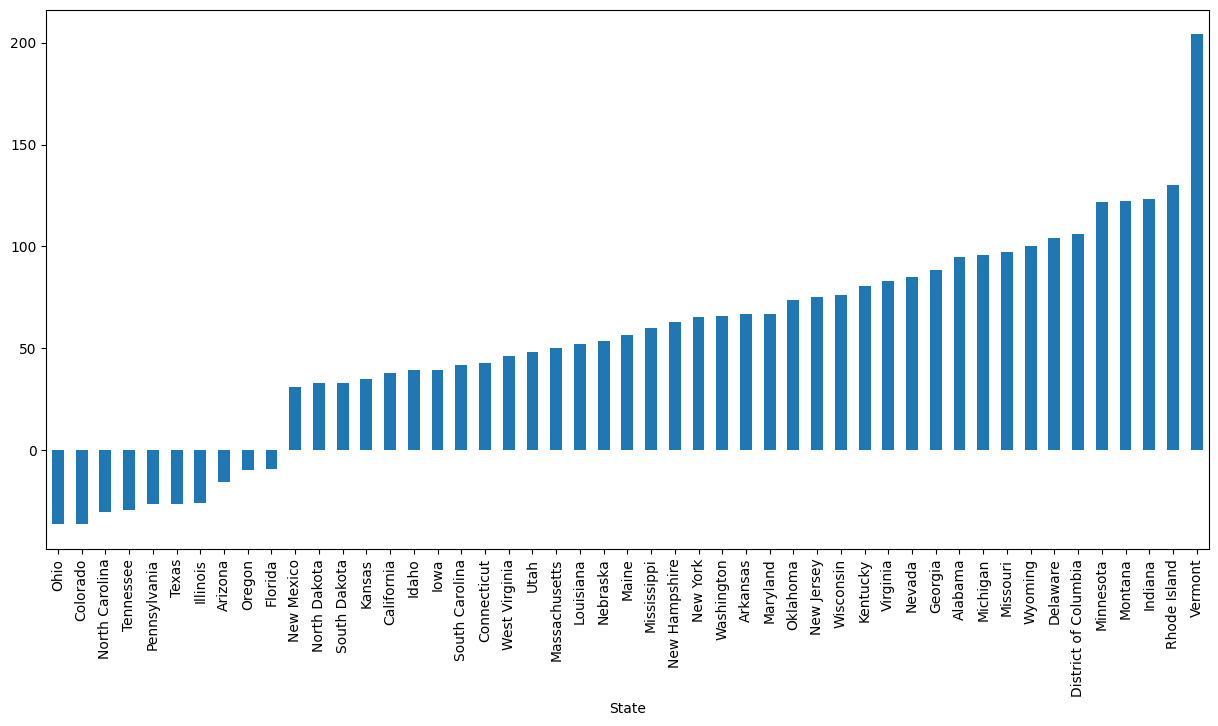

In [ ]:
data_state.sort_values('Profit')['Profit'].plot(kind='bar', figsize=(15,7))     # Same way can be done for Sales as well.

<Axes: xlabel='State'>

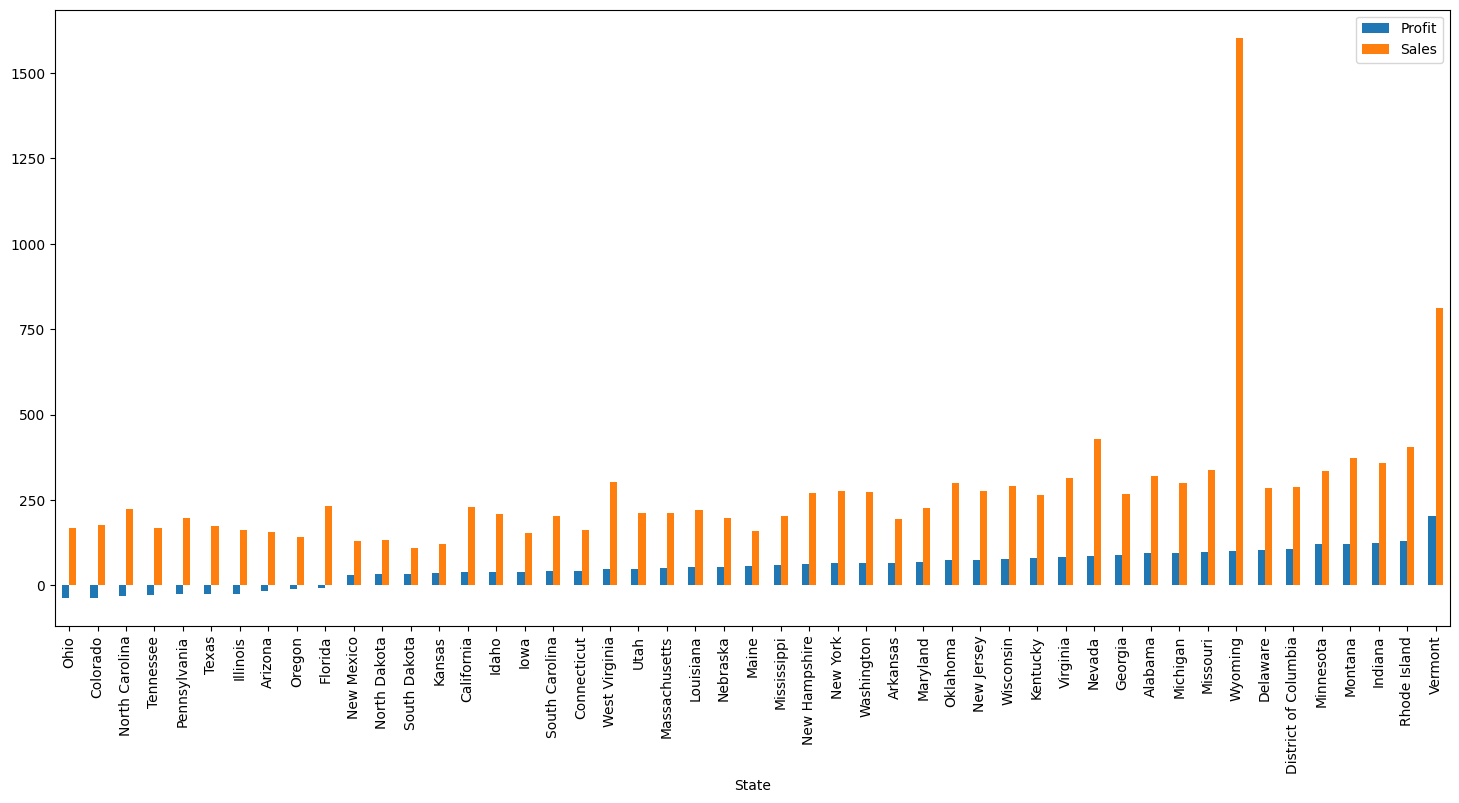

In [ ]:
# Sorted by Profits
data_state.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(18,8))

<Axes: xlabel='State'>

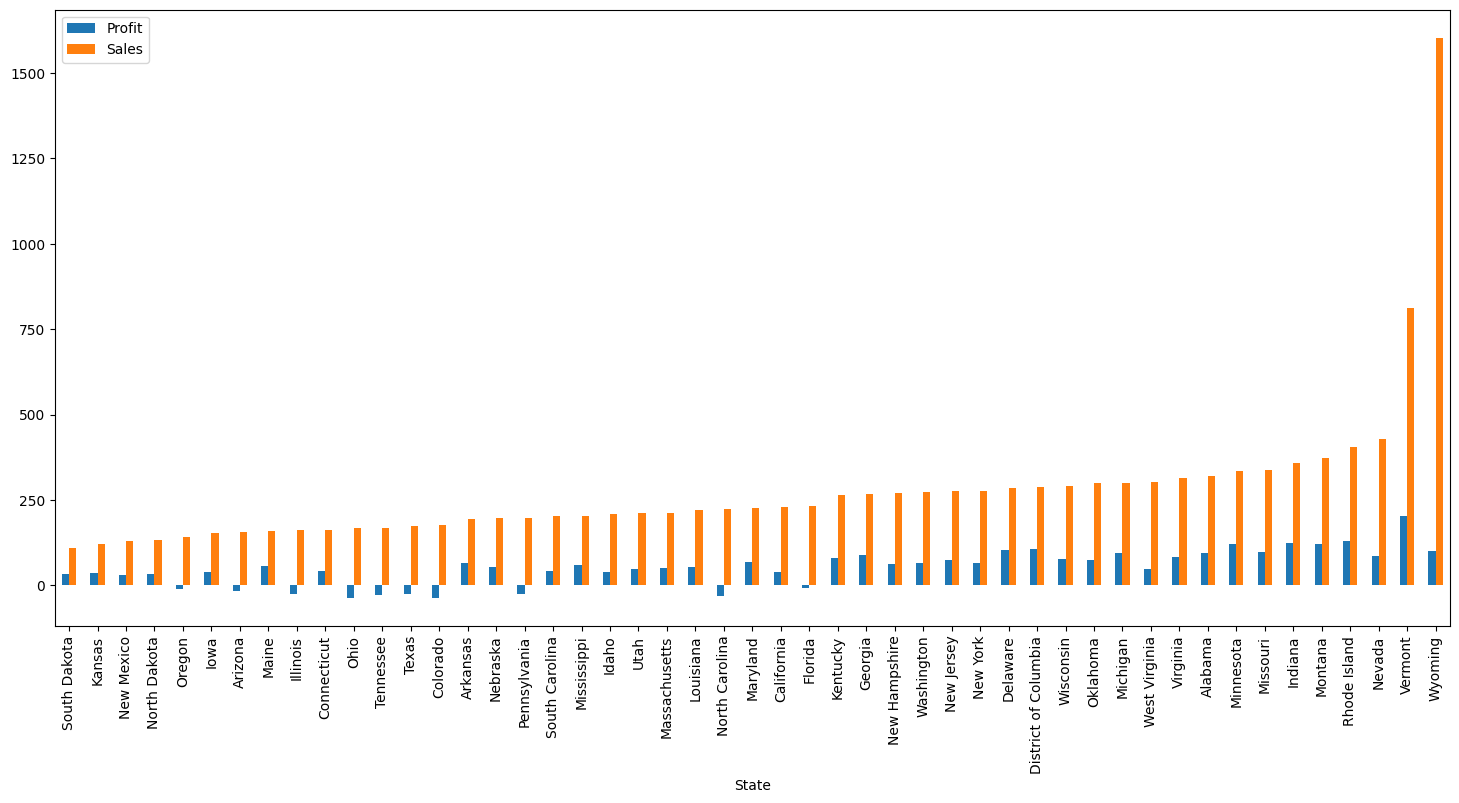

In [ ]:
# Sorted by Sales
data_state.sort_values('Sales')[['Profit','Sales']].plot(kind='bar', figsize=(18,8))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9993 non-null   object 
 1   Segment       9993 non-null   object 
 2   Country       9993 non-null   object 
 3   City          9993 non-null   object 
 4   State         9993 non-null   object 
 5   Postal Code   9993 non-null   int64  
 6   Region        9993 non-null   object 
 7   Category      9993 non-null   object 
 8   Sub-Category  9993 non-null   object 
 9   Sales         9993 non-null   float64
 10  Quantity      9993 non-null   int64  
 11  Discount      9993 non-null   float64
 12  Profit        9993 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.0+ KB


In [ ]:
# Import necessary libraries
import pandas as pd                     # For data manipulation
import plotly.express as px             # For creating interactive plots
from dash import Dash, dcc, html, Input, Output  # Dash components for building the web app

# Load the Superstore dataset from a local path
df = pd.read_csv("F:\\project1.1\\.vscode\\my_project\\sample_superstre_data_analysis\\store.csv", encoding='ISO-8859-1')

# Initialize the Dash app
app = Dash(__name__)
app.title = "Superstore Dashboard"  # Set the title shown in browser tab

# Define the layout of the dashboard
app.layout = html.Div([
    # Dashboard Header
    html.H1("📊 Superstore Dashboard", style={'textAlign': 'center'}),

    # Sidebar Filters
    html.Div([
        html.Label("Select Region:"),
        dcc.Dropdown(
            options=[{"label": r, "value": r} for r in sorted(df['Region'].unique())],
            value=None,  # Default value: no filter applied
            id="region-filter",
            placeholder="All Regions",
        ),

        html.Label("Select Category:"),
        dcc.Dropdown(
            options=[{"label": c, "value": c} for c in sorted(df['Category'].unique())],
            value=None,  # Default value: no filter applied
            id="category-filter",
            placeholder="All Categories",
        ),
    ], style={
        "width": "30%", "display": "inline-block", 
        "verticalAlign": "top", "padding": "10px"
    }),

    # Graph section (right side)
    html.Div([
        dcc.Graph(id="top-products-bar"),           # Bar chart for top products
        dcc.Graph(id="subcat-sales-bar"),           # Bar chart for sub-category sales
        dcc.Graph(id="profit-discount-scatter"),    # Scatter plot for profit vs discount
    ], style={
        "width": "68%", "display": "inline-block", 
        "padding": "10px"
    })
])

# Callback function to update graphs based on selected filters
@app.callback(
    Output("top-products-bar", "figure"),
    Output("subcat-sales-bar", "figure"),
    Output("profit-discount-scatter", "figure"),
    Input("region-filter", "value"),
    Input("category-filter", "value")
)
def update_charts(region, category):
    # Make a copy of the full dataset
    filtered_df = df.copy()

    # Apply region filter if selected
    if region:
        filtered_df = filtered_df[filtered_df["Region"] == region]

    # Apply category filter if selected
    if category:
        filtered_df = filtered_df[filtered_df["Category"] == category]

    # 1. Top 10 Products by Sales
    top_products = (
        filtered_df.groupby("Segment")["Sales"]
        .sum().nlargest(10).reset_index()
    )
    fig1 = px.bar(
        top_products, x="Sales", y="Segment", orientation="h",
        title="Top 10 Products by Sales", height=400
    )

    # 2. Sales by Sub-Category
    subcat_sales = (
        filtered_df.groupby("Sub-Category")["Sales"]
        .sum().sort_values().reset_index()
    )
    fig2 = px.bar(
        subcat_sales, x="Sales", y="Sub-Category", orientation="h",
        title="Sales by Sub-Category", height=400
    )

    # 3. Profit vs. Discount Scatter Plot
    fig3 = px.scatter(
        filtered_df, x="Discount", y="Profit", size="Sales", color="Category",
        hover_data=["Segment"], title="Profit vs. Discount", height=400
    )

    # Return all three updated figures to display
    return fig1, fig2, fig3

# Run the Dash app server (this is the entry point when script is executed)
if __name__ == "__main__":
    app.run(debug=True, port=0)
# Launch the app in debug mode for development


# Analysis Report on Superstore Data

## Overview
This report summarizes the key insights from the analysis of the Superstore dataset conducted in the provided Jupyter notebook. The dataset contains transactional data from a retail superstore, including information about orders, customers, products, and financial metrics.

## Key Findings

### 1. Dataset Structure
- The dataset contains 9,993 entries with 13 columns
- Key columns include:
  - Ship Mode (Second Class, Standard Class, etc.)
  - Segment (Consumer, Corporate, Home Office)
  - Geographic information (Country, City, State, Postal Code, Region)
  - Product categories (Category, Sub-Category)
  - Financial metrics (Sales, Quantity, Discount, Profit)

### 2. Data Quality
- No null values detected in any columns
- Data types are appropriate for each column (numeric for sales/quantity/discount/profit, categorical for others)

### 3. Initial Observations
- The dataset represents sales across different regions of the United States
- Sample transactions show:
  - A mix of product categories (Furniture, Office Supplies)
  - Varying profit margins (including some negative profits)
  - Different shipping methods and customer segments

### 4. Visualizations
The notebook includes visualizations to explore:
- Sales distribution by region and category
- Profitability analysis
- Discount impact on sales and profit
- Customer segment performance

### 5. Technical Implementation
- Analysis performed using Python's data science stack:
  - Pandas for data manipulation
  - Matplotlib and Seaborn for visualization
  - NumPy for numerical operations
- Warnings were suppressed for cleaner output

## Recommendations

1. **Profit Optimization**: Investigate products/categories with negative profits to understand pricing or cost issues

2. **Shipping Analysis**: Examine the relationship between shipping methods and profitability

3. **Regional Performance**: Identify high-performing regions and potential underperformers

4. **Customer Segmentation**: Develop targeted marketing strategies based on segment performance

5. **Discount Strategy**: Analyze optimal discount levels that maximize sales without eroding profits

## Conclusion
The Superstore dataset provides a comprehensive view of retail operations with opportunities for deeper analysis. The initial exploration reveals several avenues for improving business performance through data-driven decisions about product offerings, pricing, and customer engagement strategies.

Further analysis could benefit from:
- Time series analysis of sales trends
- Customer lifetime value calculations
- Market basket analysis for product recommendations
- Predictive modeling for demand forecasting